In [1]:
import random
from typing import List

import cv2
import matplotlib.pyplot as plt
import pandas as pd

1. Forming a dataframe with columns "Absolute path" and "Class name".

In [2]:
def read_df()->pd.DataFrame:
    df: pd.DataFrame = pd.read_csv('Annotasion.csv', usecols=["Absolute path", "Class name"])
    return df

df = read_df()
df

,Absolute path,Class name
0,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
1,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
2,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
3,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
4,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
...,...,...
1995,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip
1996,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip
1997,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip
1998,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip


2. Rename name columns.

In [3]:


def rename_columns(df: pd.DataFrame)->pd.DataFrame:
    df: pd.DataFrame = df.rename(columns={'Absolute path': 'absPath',
               'Class name': 'className'})
    return df

new_df = rename_columns(df)
new_df

,absPath,className
0,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
1,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
2,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
3,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
4,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose
...,...,...
1995,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip
1996,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip
1997,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip
1998,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip


3. Adding a new column.

In [4]:
def add_column_marks(df: pd.DataFrame)->pd.DataFrame:
    df["marks"] = 0
    df.loc[df["className"] == "tulip", "marks"] = 1
    return df

new_df = add_column_marks(new_df)
new_df

,absPath,className,marks
0,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0
1,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0
2,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0
3,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0
4,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0
...,...,...,...
1995,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1
1996,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1
1997,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1
1998,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1


4. Adding columns with information about height, width and depth.

In [5]:
def add_img_shape(df: pd.DataFrame)->pd.DataFrame:
    height_i: List[int] = []
    width_i: List[int] = []
    depth_i: List[int] = []

    for i in range(df["absPath"].size):
        img = cv2.imread(df["absPath"].iloc[i])
        if img is not None:
            height_i.append(img.shape[0])
            width_i.append(img.shape[1])
            depth_i.append(img.shape[2])
        else:
            # Обработка отсутствующих значений (пропустить или установить значения по умолчанию)
            height_i.append(None)
            width_i.append(None)
            depth_i.append(None)

    df["height"] = height_i
    df["width"] = width_i
    df["depth"] = depth_i
    return df

new_df = add_img_shape(new_df)
new_df

,absPath,className,marks,height,width,depth
0,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1600.0,2400.0,3.0
1,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1125.0,1500.0,3.0
2,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1200.0,1920.0,3.0
3,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1397.0,2048.0,3.0
4,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1200.0,1920.0,3.0
...,...,...,...,...,...,...
1995,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1280.0,1920.0,3.0
1996,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1024.0,1024.0,3.0
1997,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1200.0,1920.0,3.0
1998,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1364.0,910.0,3.0


5. Output of statistical information for columns: height, depth, width, marks.

In [6]:
def statistic_img(df: pd.DataFrame)-> tuple:
    stats_m = df['marks'].describe() 
    stats_h = df['height'].describe() 
    stats_w = df['width'].describe() 
    stats_d = df['depth'].describe()
    return stats_m, stats_h, stats_w, stats_d

all_stats = statistic_img(new_df)
print("\nstatistical information for marks\n", all_stats[0])
print("\nstatistical information for height\n", all_stats[1])
print("\nstatistical information for width\n", all_stats[2])
print("\nstatistical information for depth\n", all_stats[3])


statistical information for marks
 count    2000.000000
mean        0.500000
std         0.500125
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: marks, dtype: float64

statistical information for height
 count    1998.000000
mean     1403.135636
std       582.463912
min       157.000000
25%      1050.000000
50%      1213.000000
75%      1727.250000
max      7498.000000
Name: height, dtype: float64

statistical information for width
 count    1998.000000
mean     1956.880881
std       780.478076
min       308.000000
25%      1284.000000
50%      1920.000000
75%      2560.000000
max      8000.000000
Name: width, dtype: float64

statistical information for depth
 count    1998.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: depth, dtype: float64


6. Filtering DataFrame by a given label.

In [7]:
def filtered_df(df: pd.DataFrame, mark: int) -> pd.DataFrame:
    """
    The function takes a dataframe and a class label as input and outputs strings with the specified label.
    """
    df: pd.DataFrame = df[df.marks == mark]
    return df

filtered_df(new_df, 1)

,absPath,className,marks,height,width,depth
1000,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\00...,tulip,1,1363.0,2048.0,3.0
1001,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\00...,tulip,1,2146.0,3000.0,3.0
1002,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\00...,tulip,1,1240.0,1920.0,3.0
1003,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\00...,tulip,1,1440.0,1920.0,3.0
1004,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\00...,tulip,1,1200.0,1920.0,3.0
...,...,...,...,...,...,...
1995,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1280.0,1920.0,3.0
1996,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1024.0,1024.0,3.0
1997,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1200.0,1920.0,3.0
1998,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1364.0,910.0,3.0


7. Filtering by specified parameters.

In [8]:
def filtered_df2(mark: int, max_width: int, max_height: int, df: pd.DataFrame) -> pd.DataFrame:
    """
    The function takes a dataframe, maximum length, height, depth, and class label as input and outputs strings that meet the conditions.
    """
    df: pd.DataFrame = df[df.marks == mark][df.width <= max_width][df.height <= max_height]
    return df

filtered_df2(0, 2000, 2000, new_df)

C:\Users\PCmen\AppData\Local\Temp\ipykernel_4440\3750822390.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df: pd.DataFrame = df[df.marks == mark][df.width <= max_width][df.height <= max_height]
C:\Users\PCmen\AppData\Local\Temp\ipykernel_4440\3750822390.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df: pd.DataFrame = df[df.marks == mark][df.width <= max_width][df.height <= max_height]


,absPath,className,marks,height,width,depth
1,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1125.0,1500.0,3.0
2,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1200.0,1920.0,3.0
4,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1200.0,1920.0,3.0
5,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,764.0,1143.0,3.0
7,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,853.0,1280.0,3.0
...,...,...,...,...,...,...
987,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\098...,rose,0,1104.0,736.0,3.0
988,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\098...,rose,0,768.0,1366.0,3.0
991,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\099...,rose,0,768.0,1024.0,3.0
993,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\099...,rose,0,800.0,600.0,3.0


8. Grouping a DataFrame by class label with calculation of the maximum, minimum and average values by the number of pixels.

In [9]:
def add_column_pixel(df: pd.DataFrame)->pd.DataFrame:
    df["pixel"] = df.height * df.width
    result: pd.DataFrame = df.groupby("marks").agg({"pixel": ['mean', 'min', 'max']})
    return df

new_df = add_column_pixel(new_df)
new_df

,absPath,className,marks,height,width,depth,pixel
0,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1600.0,2400.0,3.0,3840000.0
1,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1125.0,1500.0,3.0,1687500.0
2,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1200.0,1920.0,3.0,2304000.0
3,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1397.0,2048.0,3.0,2861056.0
4,C:\Users\PCmen\Desktop\Lab3Py\dataset\rose\000...,rose,0,1200.0,1920.0,3.0,2304000.0
...,...,...,...,...,...,...,...
1995,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1280.0,1920.0,3.0,2457600.0
1996,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1024.0,1024.0,3.0,1048576.0
1997,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1200.0,1920.0,3.0,2304000.0
1998,C:\Users\PCmen\Desktop\Lab3Py\dataset\tulip\09...,tulip,1,1364.0,910.0,3.0,1241240.0


9. Histogram.

In [10]:
def create_histogram(df: pd.DataFrame, mark: int):
    """
    The function takes a dataframe and a class label as input, returns 
    a list of arrays of histogram points(each array corresponds to the values of the histogram for each channel).
    """
    new_df: pd.DataFrame = filtered_df(df, mark)
    image_path:str = new_df["absPath"].iloc[random.randint(0, 1000)]
    image = cv2.imread(image_path)
    color = []
    for i in range(0, 3):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        color.append(histr)
    return color, image

10. Building a histogram.

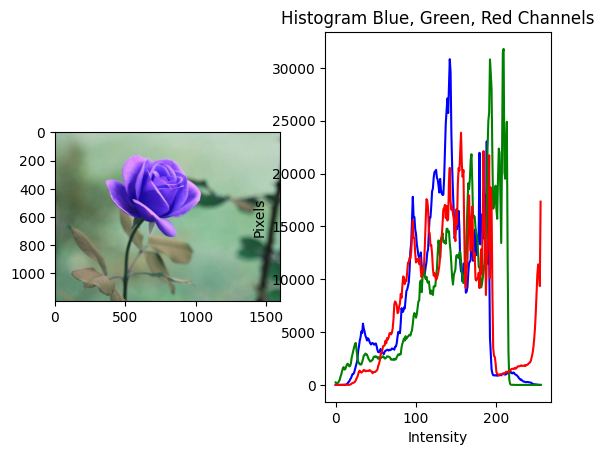

In [11]:
def histogram_rendering(df: pd.DataFrame, mark: int) -> None:
    """
    The function takes a dataframe and a class label as 
    input and builds histograms by calling create_histogram.
    """
    histr, image = create_histogram(df, mark)

    plt.subplot(1, 2, 1)
    plt.imshow(image)

    plt.subplot(1, 2, 2)
    plt.plot(histr[0], color="b")
    plt.plot(histr[1], color="g")
    plt.plot(histr[2], color="r")
    plt.title("Histogram Blue, Green, Red Channels")
    plt.xlabel("Intensity")
    plt.ylabel("Pixels")
    plt.show()


histogram_rendering(new_df, 0)